# Лабораторная №1. Основы предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла Preprocessing basics.ipynb (и не только).


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Медиана какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего unskilled работников мужского рода?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе? Как они обозначены <br>
7. Попытайтесь заполнить пропущенные значения минимум двумя способами.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Какой признак(и) (если такой(ие) есть) кажется вам проблематичным? Что бы вы предложили с ним сделать?<br>
12. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

**German Credit data** <br>
This dataset classifies people described by a set of attributes as good or bad credit risks ('class' attribute). <br>
1. checking_status -  Status of existing checking account, in Deutsche Mark.
2. duration - Duration in months
3. credit_history - Credit history (credits taken, paid back duly, delays, critical accounts)
4. purpose - Purpose of the credit (car, television,…)
5. credit_amount - Credit amount
6. savings_status - Status of savings account/bonds, in Deutsche Mark.
7. employment - Present employment, in number of years.
8. installment_commitment - Installment rate in percentage of disposable income
9. personal_status - Personal status (married, single,…) and sex
10. other_parties - Other debtors / guarantors
11. property_magnitude - Property (e.g. real estate)
12. age - Age in years
13. other_payment_plans - Other installment plans (banks, stores)
14. housing - Housing (rent, own,…)
15. existing_credits - Number of existing credits at this bank
16. job - Job
17. num_dependents - Number of people being liable to provide maintenance for
18. own_telephone - Telephone (yes,no)
19. foreign_worker - Foreign worker (yes,no)

## В какой шкале представлены все признаки в наборе?

Ratio: duration, credit_amount, residence_since, age, existing_credits, num_dependents
Nominal: credit_history, personal_status, other_parties, own_telephone, foreign_worker, job, housing, property_magnitude
Ordinal: checking_status, employment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=3)
pd.set_option('display.precision', 3)

sns.set()

In [2]:
#path=''
credit_df = pd.read_csv('credit_3530203_80101.csv', index_col=0)
credit_df.sample(7)

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
461,<0,15.0,existing paid,1721.0,<1,male single,none,3.0,real estate,36.0,own,1.0,skilled,1.0,none,yes,good
298,no checking,18.0,existing paid,2515.0,1<=X<4,male single,none,4.0,real estate,43.0,own,1.0,skilled,1.0,yes,yes,good
353,<0,12.0,no credits/all paid,6199.0,1<=X<4,male single,none,2.0,life insurance,28.0,rent,2.0,skilled,1.0,yes,yes,bad
406,no checking,24.0,critical/other existing credit,2197.0,4<=X<7,male single,none,4.0,car,43.0,own,2.0,skilled,2.0,yes,yes,good
250,<0,6.0,critical/other existing credit,666.0,4<=X<7,female div/dep/mar,none,4.0,real estate,39.0,own,2.0,unskilled resident,1.0,yes,yes,good
232,no checking,12.0,existing paid,2141.0,4<=X<7,male single,none,1.0,no known property,35.0,own,1.0,skilled,1.0,none,yes,good
129,<0,12.0,critical/other existing credit,3499.0,1<=X<4,female div/dep/mar,co applicant,2.0,real estate,29.0,own,2.0,skilled,1.0,none,yes,bad


## Укажите признак с наименьшей дисперсией.

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     501 non-null    object 
 1   duration            501 non-null    float64
 2   credit_history      501 non-null    object 
 3   credit_amount       501 non-null    float64
 4   employment          501 non-null    object 
 5   personal_status     501 non-null    object 
 6   other_parties       501 non-null    object 
 7   residence_since     501 non-null    float64
 8   property_magnitude  501 non-null    object 
 9   age                 501 non-null    float64
 10  housing             501 non-null    object 
 11  existing_credits    501 non-null    float64
 12  job                 501 non-null    object 
 13  num_dependents      501 non-null    float64
 14  own_telephone       501 non-null    object 
 15  foreign_worker      501 non-null    object 
 16  class   

In [22]:
credit_df.var()

C:\Users\E784~1\AppData\Local\Temp/ipykernel_17096/1403863766.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credit_df.var()


duration            1.465e+02
credit_amount       8.061e+06
residence_since     1.351e+00
age                 1.315e+02
existing_credits    3.231e-01
num_dependents      1.233e-01
dtype: float64

## Медиана какого признака отличается для двух классов сильнее всего?

In [24]:
credit_df_good = credit_df[credit_df['class'] == 'good']
credit_df_good

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,1169.0,>=7,male single,none,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good
2,no checking,12.0,critical/other existing credit,2096.0,4<=X<7,male single,none,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,7882.0,4<=X<7,male single,guarantor,4.0,life insurance,45.0,for free,1.0,skilled,2.0,none,yes,good
5,no checking,36.0,existing paid,9055.0,1<=X<4,male single,none,4.0,no known property,35.0,for free,1.0,unskilled resident,2.0,yes,yes,good
6,no checking,24.0,existing paid,2835.0,>=7,male single,none,4.0,life insurance,53.0,own,1.0,skilled,1.0,none,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0<=X<200,6.0,existing paid,368.0,>=7,male single,none,4.0,life insurance,38.0,own,1.0,skilled,1.0,none,yes,good
494,<0,12.0,critical/other existing credit,2122.0,1<=X<4,male single,none,2.0,real estate,39.0,rent,2.0,unskilled resident,2.0,none,no,good
497,no checking,24.0,critical/other existing credit,1585.0,4<=X<7,male single,none,3.0,life insurance,40.0,own,2.0,skilled,1.0,none,yes,good
498,0<=X<200,18.0,existing paid,1301.0,>=7,male mar/wid,guarantor,2.0,real estate,32.0,own,1.0,unskilled resident,1.0,none,yes,good


In [35]:
credit_df_bad = credit_df[credit_df['class'] == 'bad']
credit_df_bad

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
1,0<=X<200,48.0,existing paid,5951.0,1<=X<4,female div/dep/mar,none,2.0,real estate,22.0,own,1.0,skilled,1.0,none,yes,bad
4,<0,24.0,delayed previously,4870.0,1<=X<4,male single,none,4.0,no known property,53.0,for free,2.0,skilled,2.0,none,yes,bad
9,0<=X<200,30.0,critical/other existing credit,5234.0,unemployed,male mar/wid,none,2.0,car,28.0,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad
10,0<=X<200,12.0,existing paid,1295.0,<1,female div/dep/mar,none,1.0,car,25.0,rent,1.0,skilled,1.0,none,yes,bad
11,<0,48.0,existing paid,4308.0,<1,female div/dep/mar,none,4.0,life insurance,24.0,rent,1.0,skilled,1.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0<=X<200,6.0,delayed previously,1209.0,unemployed,male single,none,4.0,life insurance,47.0,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,bad
491,0<=X<200,27.0,no credits/all paid,8318.0,>=7,female div/dep/mar,none,4.0,no known property,42.0,for free,2.0,high qualif/self emp/mgmt,1.0,yes,yes,bad
495,<0,24.0,existing paid,2996.0,1<=X<4,male mar/wid,none,4.0,car,20.0,own,1.0,skilled,1.0,none,yes,bad
496,0<=X<200,36.0,existing paid,-999.0,<1,male single,co applicant,1.0,no known property,29.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,bad


In [36]:
credit_df_good.median()

C:\Users\E784~1\AppData\Local\Temp/ipykernel_9916/103257661.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credit_df_good.median()


duration              15.0
credit_amount       2138.5
residence_since        3.0
age                   34.0
existing_credits       1.0
num_dependents         1.0
dtype: float64

In [37]:
credit_df_bad.median()

C:\Users\E784~1\AppData\Local\Temp/ipykernel_9916/3978464783.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credit_df_bad.median()


duration              24.0
credit_amount       2762.0
residence_since        3.0
age                   31.0
existing_credits       1.0
num_dependents         1.0
dtype: float64

In [38]:
credit_df_bad.median()-credit_df_good.median()

C:\Users\E784~1\AppData\Local\Temp/ipykernel_9916/1834121082.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credit_df_bad.median()-credit_df_good.median()


duration              9.0
credit_amount       623.5
residence_since       0.0
age                  -3.0
existing_credits      0.0
num_dependents        0.0
dtype: float64

## В каком классе больше всего unskilled работников мужского рода?

In [50]:
credit_df_good_un_man = credit_df_good[credit_df_good['personal_status'].str.startswith('male') & credit_df_good['job'].str.startswith('unskilled')]
credit_df_good_un_man

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
2,no checking,12.0,critical/other existing credit,2096.0,4<=X<7,male single,none,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good
5,no checking,36.0,existing paid,9055.0,1<=X<4,male single,none,4.0,no known property,35.0,for free,1.0,unskilled resident,2.0,yes,yes,good
8,no checking,12.0,existing paid,3059.0,4<=X<7,male div/sep,none,4.0,real estate,61.0,own,1.0,unskilled resident,1.0,none,yes,good
22,<0,10.0,critical/other existing credit,2241.0,<1,male single,none,3.0,real estate,48.0,rent,2.0,unskilled resident,2.0,none,no,good
25,<0,6.0,existing paid,1374.0,1<=X<4,male single,none,2.0,real estate,36.0,own,1.0,unskilled resident,1.0,yes,yes,good
26,no checking,6.0,no credits/all paid,426.0,>=7,male mar/wid,none,4.0,car,39.0,own,1.0,unskilled resident,1.0,none,yes,good
33,no checking,12.0,critical/other existing credit,1264.0,>=7,male single,none,4.0,no known property,57.0,rent,1.0,unskilled resident,1.0,none,yes,good
42,0<=X<200,18.0,delayed previously,6204.0,1<=X<4,male single,none,4.0,real estate,44.0,own,1.0,unskilled resident,2.0,yes,yes,good
48,no checking,11.0,critical/other existing credit,7228.0,1<=X<4,male single,none,4.0,life insurance,39.0,own,2.0,unskilled resident,1.0,none,yes,good
50,0<=X<200,24.0,delayed previously,2333.0,<1,male single,none,2.0,life insurance,29.0,own,1.0,unskilled resident,1.0,none,yes,good


In [48]:
credit_df_bad_un_man = credit_df_bad[credit_df_bad['personal_status'].str.startswith('male') & credit_df_bad['job'].str.startswith('unskilled')]
credit_df_bad_un_man

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
13,<0,24.0,critical/other existing credit,1199.0,>=7,male single,none,4.0,car,60.0,own,2.0,unskilled resident,1.0,none,yes,bad
35,0<=X<200,45.0,critical/other existing credit,4746.0,<1,male single,none,2.0,life insurance,25.0,own,2.0,unskilled resident,1.0,none,yes,bad
137,0<=X<200,12.0,existing paid,766.0,1<=X<4,male single,none,3.0,real estate,66.0,own,1.0,unskilled resident,1.0,none,yes,bad
182,<0,21.0,all paid,1647.0,1<=X<4,male single,none,2.0,life insurance,40.0,own,2.0,unskilled resident,2.0,none,yes,bad
191,0<=X<200,48.0,no credits/all paid,3844.0,4<=X<7,male single,none,4.0,no known property,34.0,for free,1.0,unskilled resident,2.0,none,yes,bad
237,0<=X<200,21.0,existing paid,2767.0,>=7,male div/sep,none,2.0,car,61.0,rent,2.0,unskilled resident,1.0,none,yes,bad
274,<0,30.0,existing paid,11998.0,<1,male div/sep,none,1.0,no known property,34.0,own,1.0,unskilled resident,1.0,yes,yes,bad
302,>=200,24.0,critical/other existing credit,1344.0,4<=X<7,male single,none,2.0,real estate,37.0,own,2.0,unskilled resident,2.0,none,yes,bad
307,<0,12.0,existing paid,-999.0,<1,male mar/wid,none,3.0,no known property,33.0,own,1.0,unskilled resident,1.0,yes,yes,bad
313,0<=X<200,12.0,existing paid,685.0,4<=X<7,male mar/wid,none,3.0,car,25.0,own,1.0,unskilled resident,1.0,none,yes,bad


In [59]:
len(credit_df_good_un_man)

53

## Есть ли в наборе признаки с выбросами? Какие?

<AxesSubplot:xlabel='duration'>

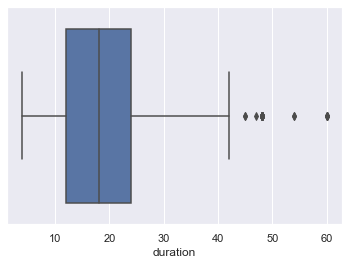

In [60]:
sns.boxplot(x='duration', data=credit_df)

<AxesSubplot:xlabel='credit_amount'>

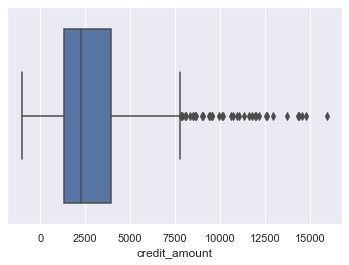

In [61]:
sns.boxplot(x='credit_amount', data=credit_df)

In [56]:
credit_df[credit_df['credit_amount'] < 0]

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
238,no checking,12.0,critical/other existing credit,-999.0,1<=X<4,female div/dep/mar,none,2.0,life insurance,35.0,own,2.0,skilled,1.0,none,yes,good
277,<0,12.0,existing paid,-999.0,>=7,male div/sep,none,4.0,life insurance,49.0,own,1.0,unskilled resident,1.0,yes,yes,good
307,<0,12.0,existing paid,-999.0,<1,male mar/wid,none,3.0,no known property,33.0,own,1.0,unskilled resident,1.0,yes,yes,bad
355,0<=X<200,24.0,existing paid,-999.0,<1,male single,none,2.0,real estate,23.0,own,1.0,unskilled resident,1.0,none,yes,bad
457,<0,12.0,existing paid,-999.0,>=7,male single,none,4.0,no known property,35.0,for free,1.0,skilled,1.0,yes,yes,bad
496,0<=X<200,36.0,existing paid,-999.0,<1,male single,co applicant,1.0,no known property,29.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,bad


In [57]:
len(credit_df[credit_df['credit_amount'] == 0])

0

<AxesSubplot:xlabel='age'>

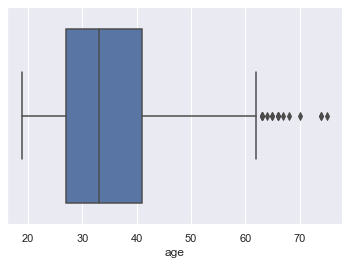

In [58]:
sns.boxplot(x='age', data=credit_df)

In [60]:
credit_df['age'].min()

19.0

In [59]:
credit_df['age'].max()

75.0

<AxesSubplot:xlabel='num_dependents'>

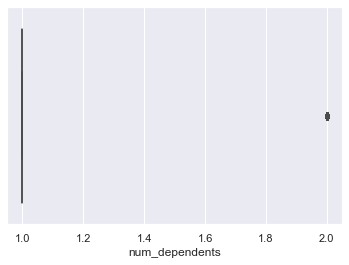

In [64]:
sns.boxplot(x='num_dependents', data=credit_df)

<AxesSubplot:xlabel='existing_credits'>

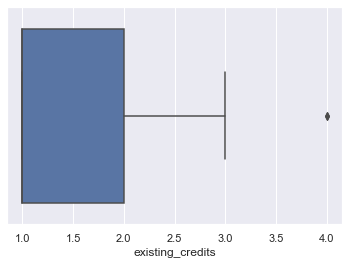

In [65]:
sns.boxplot(x='existing_credits', data=credit_df)

В наборе **нет** выбросов, так как **duration**=60 месяцев (5 лет) - нормальный срок кредитования; **credit_amount** - сумма кредита может быть варьироваться в зависимости от цели взятия, -999 не выброс, а *пустое значение*; **existing_credits** - количество кредитов также вполне реалистично; **age** - максимальный возраст 75 не является выбросом, так как в среднем именно до этого возраста банки выдают кредит, минимальный возраст также удовлетворяет критериям выдачи кредита

## Сколько пропущенных значений в наборе? Как они обозначены

In [3]:
credit_df['residence_since'].unique()

array([ 4.,  2.,  3.,  1., -1.])

In [82]:
len(credit_df[credit_df['residence_since'] == -1])

5

In [61]:
len(credit_df[credit_df['credit_amount'] < 0])

6

В наборе есть пропущенные значения в признаках:
 **residence_since** - 5 пропущенных значений, обозначены как -1
 **credit_amount** - 6 строк, обозначены как -999

## Попытайтесь заполнить пропущенные значения минимум двумя способами.

In [5]:
credit_df_filled_na = credit_df.copy()
credit_df_filled_na['residence_since'].replace(-1, np.nan, inplace=True)
credit_df_filled_na['credit_amount'].replace(-999, np.nan, inplace=True)
credit_df_filled_na.isnull().sum()

checking_status       0
duration              0
credit_history        0
credit_amount         6
employment            0
personal_status       0
other_parties         0
residence_since       5
property_magnitude    0
age                   0
housing               0
existing_credits      0
job                   0
num_dependents        0
own_telephone         0
foreign_worker        0
class                 0
dtype: int64

In [9]:
credit_df_filled = credit_df_filled_na.copy()
credit_df_filled['credit_amount'].fillna(credit_df_filled_na.credit_amount.median(), inplace=True)
credit_df_filled['residence_since'].fillna(0, inplace=True)
len(credit_df_filled[credit_df_filled['credit_amount'] == credit_df_filled_na.credit_amount.median()])

7

In [10]:
len(credit_df_filled[credit_df_filled['residence_since'] == 0])

5

## Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

C:\ProgramData\Anaconda3\envs\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

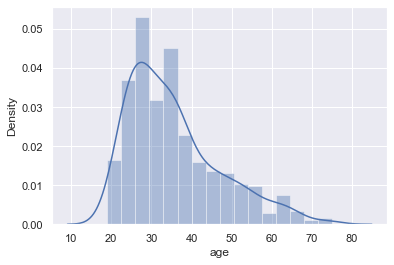

In [104]:
#абсолютный
sns.distplot(credit_df.age)

C:\ProgramData\Anaconda3\envs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='own_telephone', ylabel='count'>

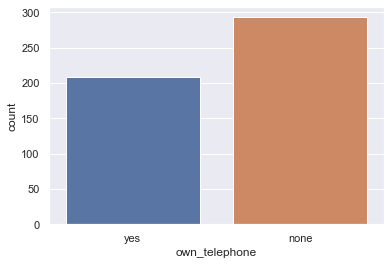

In [105]:
#бинарный
sns.countplot(credit_df.own_telephone)

C:\ProgramData\Anaconda3\envs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='employment', ylabel='count'>

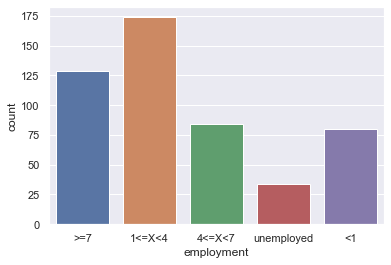

In [106]:
# порядковая
sns.countplot(credit_df.employment)

C:\ProgramData\Anaconda3\envs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_magnitude', ylabel='count'>

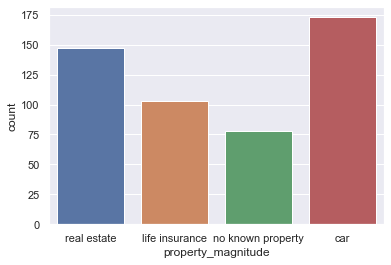

In [109]:
#номинальный
sns.countplot(credit_df.property_magnitude)

## Проанализируйте взаимосвязи признаков с помощью scatter plot матрицы и тепловой карты корреляций. Какие выводы можно сделать

In [4]:
num_columns = credit_df.describe().columns
num_columns

Index(['duration', 'credit_amount', 'residence_since', 'age',
       'existing_credits', 'num_dependents'],
      dtype='object')

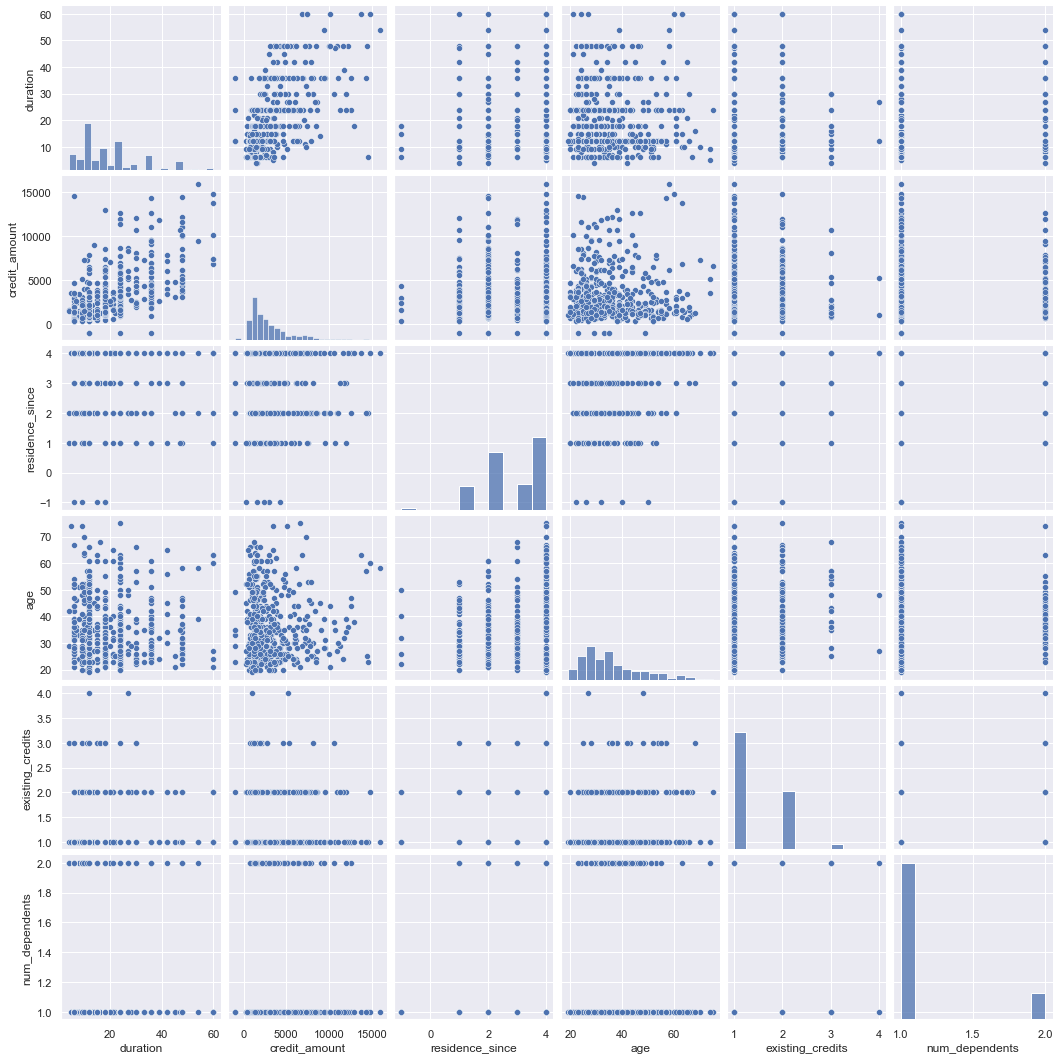

In [5]:
sns.pairplot(credit_df[num_columns])

**На основании scatter-plot матрицы:**
**age - duration** = пожилые не берут на большой срок
**age - resinence_since** = в среднем чем старше человек, тем дольше он является резидентом
**credit_amount - duration**  = в среднем больше кредит - больше срок
**credit_amount  - age**   = молодые чаще оформляют кредиты на меньшую сумму


In [11]:
corr_matrix = credit_df[num_columns].corr(method = 'spearman')
corr_matrix

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
duration,1.000,0.597,0.047,-0.069,0.005,-0.036
credit_amount,0.597,1.000,0.033,-0.025,0.023,0.042
residence_since,0.047,0.033,1.000,0.289,0.043,0.080
age,-0.069,-0.025,0.289,1.000,0.149,0.185
existing_credits,0.005,0.023,0.043,0.149,1.000,0.103
num_dependents,-0.036,0.042,0.080,0.185,0.103,1.000


**На основании карты тепловой корреляции можно сделать выводы:**
Низкая корреляция практически у всех параметров. Сильная корреляция между credit_amount и duration т.е. между размером кредита и сроком кредитования. Средняя нелинейная корреляция между residence_since и age.

<AxesSubplot:>

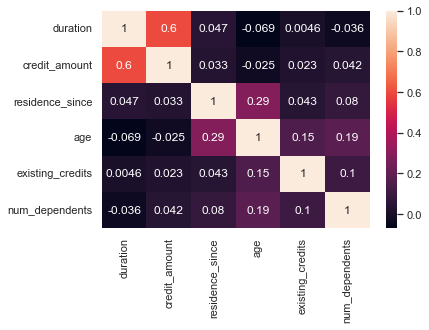

In [12]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

## Какой признак(и) имеет смысл стандартизировать? Почему?

<AxesSubplot:>

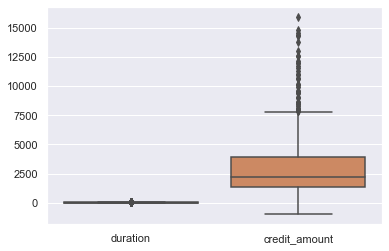

In [13]:
sns.boxplot(data=credit_df[['duration', 'credit_amount']])

In [14]:
std_scaler = StandardScaler().fit(credit_df[['duration', 'credit_amount']])

cols_std_scaled = std_scaler.transform(credit_df[['duration', 'credit_amount']])

In [16]:
credit_df_scaled = pd.DataFrame(cols_std_scaled, columns = ['duration', 'credit_amount'])

<AxesSubplot:>

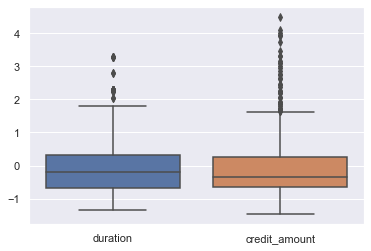

In [17]:
sns.boxplot(data=credit_df_scaled[['duration', 'credit_amount']])

## Какой признак(и) (если такой(ие) есть) кажется вам проблематичным? Что бы вы предложили с ним сделать?

Колонку employment изменить на числовой тип. Записывать следует к-во лет, в течении которых человек работает в одной компании.
Разделить колонку personal_status на два поля: Sex и Family_status.

## Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.
**Salary_per_year** - числовой тип, определяющий годовой доход человека. Банк соотнесет вашу з/п со средней з/п специалистов вашего профиля в регионе, чтобы понимать, какой доход вы можете получать в случае увольнения с текущего места работы.
